# 소프트맥스회귀 (MNIST 데이터셋)
- MNIST는 인공지능 연구의 권위자 LeCun 교수가 만든 데이터 셋
- 딥러닝을 공부할 때 반드시 거쳐야 할 Hello, World같은 존재
- MNIST는 60,000개의 트레이닝 셋과 10,000개의 테스트 셋으로 이루어져 있고 이중 트레이닝 셋을 학습데이터로 사용하고 테스트 셋을 신경망을 검증하는 데에 사용한다.


## #01. 패키지 준비

In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import  DataFrame 
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# 예제에서 사용할 데이터셋을 다운로드 받기 위한 함수
from tensorflow.keras.datasets.mnist import load_data

## #02. 데이터셋 준비

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')  

# 3차원 데이터

훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


## #03. 데이터 전처리
- 결측치 등의 데이터 이상점이 없는 예제 데이터 이므로 생략

## #04. 탐색적 데이터 분석

### 임의의 샘플 데이터 확인

In [25]:
len(x_train[0][0])

28

In [26]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [14]:
print(np.max(x_train[1]))

255


In [17]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000051159253159050000000000000000000000000
000000000000000000000000000000000000000000048238252252252237000000000000000000000000
000000000000000000000000000000000000000054227253252239233252057006000000000000000000
000000000000000000000000000000000010060224252253252202084252253122000000000000000000
000000000000000000000000000000000163252252252253252252096189253167000000000000000000
000000000000000000000000000000051238253253190114253228047079255168000000000000000000
000000000000000000000000000048238252252179012075121021000000253243050000000000000000
00000000000000000000000003816525323320808400000000000000000025325

In [18]:
print(y_train[1])

0


### 데이터 그려보기

mnist 데이터셋은 0~9까지 가로 28px, 세로 28px크기의 이미지 60000장 + 10000장 데이터.

글자를 표현하는 간단한 이미지이므로 배경색을 단색으로 처리하고 글자가 표시되는 영역의 색상을 노란색으로 표현

색상값은 0~255사이의 10진 정수.

그러므로 이미지 데이터들은 이미지 픽셀 크기만큼의 2차 배열의 각 원소가 색상값을 의미하는 숫자로 구성된 데이터로 표현 가능.

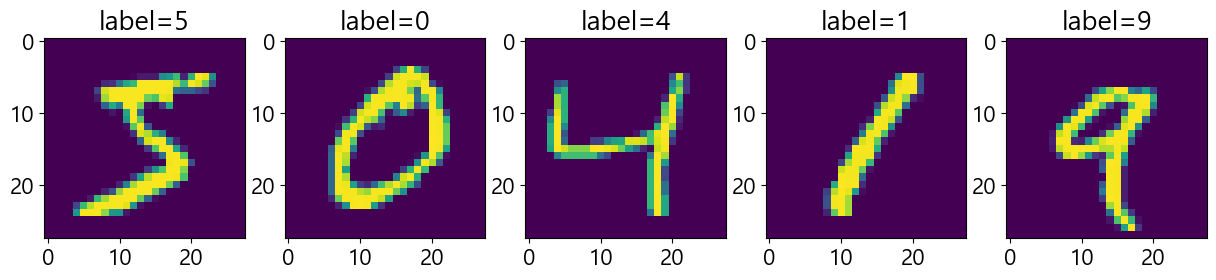

In [20]:
fig, ax = plt.subplots(1,5,figsize=(15,3), dpi=100)

for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train)
    ax[i].set_title("label=%d" % label)

plt.show()
plt.close()

## #05. 데이터셋 분할

### 랜덤시드 고정

In [27]:
np.random.seed(777)

### 훈련데이터(독립변수)와 레이블(종속변수) 구분하기
- 처음부터 데이터 셋이 구분되어 있었으므로 생략

### 훈련데이터와 검증데이터로 분할
- 처음부터 데이터 셋이 구분되어 있었으므로 생략

### 레이블에 대한 one-hot-encoding

In [28]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 훈련, 검증용 독립변수(이미지)의 차수 재설정

훈련 데이터의 shape가 (60000,28,28)라는 것은 가로 28, 세로 28 크기의 이미지가 60000장 이라는 의미.

즉, 28 X 28 의 이차배열이 6만개가 존재하는 의미

즉, 60000개의 2차원 배열을 학습해야하는 것보다 60000개의 784(28*28)개의 원소를 갖는 1차원 배열을 학습하는 것이 학습 효율이 더 좋다. 

In [29]:
x_train.shape

(60000, 28, 28)

In [31]:
x_train_reshape = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(f'훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_test_reshape.shape}')
print(x_train_reshape[0])

훈련 데이터 (60000, 784) / 검증 데이터 (10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 

### 이미지 데이터 정규화

각 픽셀의 색상값은 0~255 사이의 값을 갖는다.

그러므로 색상값을 255로 나눠서 0~1 사이의 범위를 갖도록 데이터 정규화가 수행된다.

In [32]:
x_train_normal = x_train_reshape / 255
x_test_normal = x_test_reshape / 255

#확인해보기
print(len(x_train_normal[0]))
x_train_normal[0]

784


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## #06. 모델개발

### 모델정의

In [41]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(len(x_train_normal[0]), )))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [42]:
result = model.fit(x_train_normal, y_train_one_hot, epochs=500, validation_data=(x_test_normal, y_test_one_hot), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2045 - acc: 0.9387 - val_loss: 0.0979 - val_acc: 0.9677 - lr: 0.0010
Epoch 2/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0850 - acc: 0.9738 - val_loss: 0.0880 - val_acc: 0.9710 - lr: 0.0010
Epoch 3/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0587 - acc: 0.9810 - val_loss: 0.0749 - val_acc: 0.9775 - lr: 0.0010
Epoch 4/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0453 - acc: 0.9854 - val_loss: 0.0844 - val_acc: 0.9755 - lr: 0.0010
Epoch 5/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0336 - acc: 0.9893 - val_loss: 0.0752 - val_acc: 0.9796 - lr: 0.0010
Epoch 6/500
1873/1875 [============================>.] - ETA: 0s - loss: 0.0286 - acc: 0.9906
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - acc: 0.9906 - 

## #07. 학습 결과 평가

### 학습결과 시각화

In [45]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df

,loss,acc,val_loss,val_acc,lr,epochs
0,0.204535,0.938683,0.097945,0.9677,0.00100,1
1,0.085044,0.973767,0.088026,0.9710,0.00100,2
2,0.058682,0.980983,0.074914,0.9775,0.00100,3
3,0.045268,0.985383,0.084411,0.9755,0.00100,4
4,0.033569,0.989283,0.075238,0.9796,0.00100,5
5,0.028582,0.990650,0.077576,0.9787,0.00100,6
6,0.009531,0.997067,0.072042,0.9818,0.00050,7
7,0.006383,0.998117,0.072136,0.9839,0.00050,8
8,0.006263,0.997933,0.086663,0.9806,0.00050,9
9,0.005223,0.998333,0.092687,0.9811,0.00050,10


In [47]:
result_df.columns

train_column_name = [result_df.columns[0], result_df.columns[1]]
test_column_name = [result_df.columns[2], result_df.columns[3]]

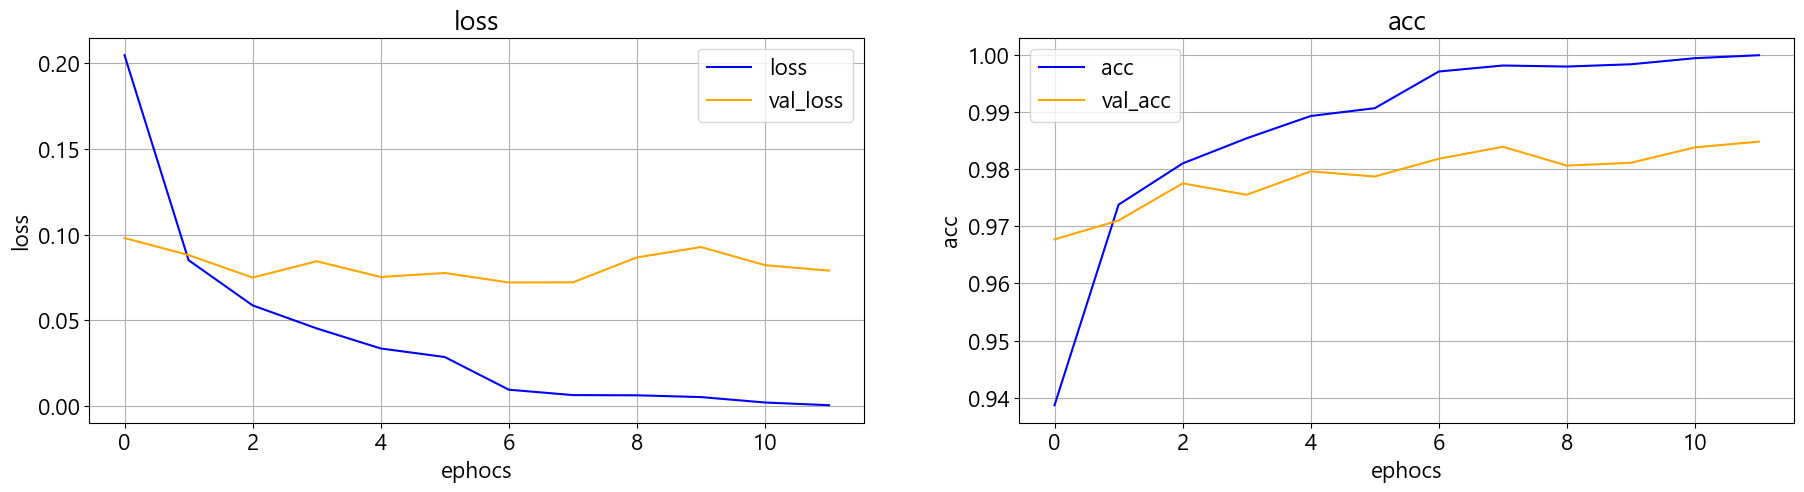

In [50]:
fig, ax = plt.subplots(1,2, figsize=(22,5))

for i,v in enumerate(ax):
    sb.lineplot(x=result_df.index, y=train_column_name[i], data=result_df, color='blue', label=train_column_name[i], ax=v)
    sb.lineplot(x=result_df.index, y=test_column_name[i], data=result_df, color='orange', label=test_column_name[i], ax=v)
    v.set_title(train_column_name[i])
    v.set_xlabel('ephocs')
    v.set_ylabel(train_column_name[i])
    v.grid()
    v.legend()

plt.show()
plt.close()

In [53]:
evaluate1 = model.evaluate(x_train_normal, y_train_one_hot)
print("최종 훈련 손실률 : %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test_normal, y_test_one_hot)
print("최종 검증 손실률 : %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

1875/1875 [==============================] - 5s 3ms/step - loss: 1.9724e-04 - acc: 1.0000
최종 훈련 손실률 : 0.000197, 최종 훈련 정확도: 1.000000
313/313 [==============================] - 1s 3ms/step - loss: 0.0790 - acc: 0.9848
최종 검증 손실률 : 0.078957, 최종 검증 정확도: 0.984800


## #08. 학습 결과 적용

### 테스트 데이터에 대한 예측 결과 산정

In [54]:
result = model.predict(x_test_normal)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다" % (data_count, case_count))
result[0]

313/313 [==============================] - 1s 2ms/step
10000개의 검증 데이터가 10개의 경우의 수를 갖는다


array([2.0819757e-17, 5.1235461e-14, 4.1349848e-14, 8.7101499e-09,
       2.0966158e-14, 5.6649505e-16, 1.0854688e-23, 1.0000000e+00,
       2.6852926e-14, 2.9274499e-10], dtype=float32)

### 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

In [55]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 데이터 비교

In [ ]:
row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=(()))